In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from src import airport_graph_loader
from src.flight_schedule_gen import FlightScheduleGen

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


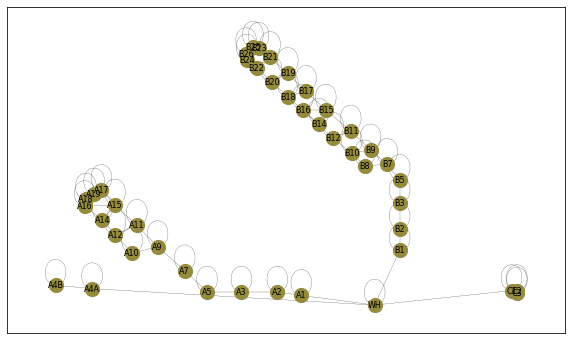

In [20]:
G_airport = airport_graph_loader.load_sparse('data/gate_pos.csv')

plt.figure(figsize=(10,6))
node_pos = nx.get_node_attributes(G_airport, 'pos')
nx.draw_networkx(
    G_airport, 
    node_pos, 
    width=0.2, 
    node_size=200, 
    font_size=8, 
    with_labels=True, 
    node_color=np.array([148,139,61])/255)

total wheelchair demaind = 26
min number of wheelchairs = 12


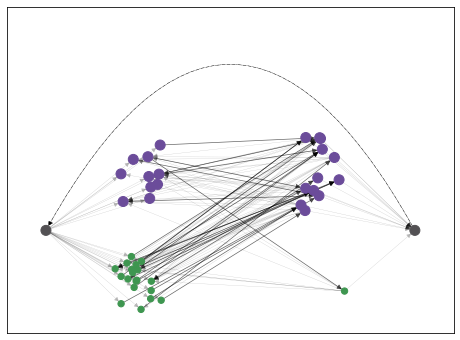

In [3]:
gen = FlightScheduleGen(G_airport)

G_schedule = gen.generate(
    n_flights_in=10, 
    n_flights_out=12, 
    p_geom_connect=.95, 
    p_geom_external=.07
)

flow_dict = nx.min_cost_flow(G_schedule)
print('total wheelchair demaind =', gen.total_demand)
print('min number of wheelchairs =', flow_dict['t']['s'])

gen.visualize()